# Méthode de Monte-Carlo

In [1]:
import numpy as np
from random import randint
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
import time

## Partie 1

1. Discretisation du domaine D.

In [2]:
L1 = 100 # paramètre de discretisation du domaine
K1 = 20 # paramètre d'estimation de la solution
D_L = [] # domaine discrétisé
for i in range(L1+1):
        D_L.append([[j,i] for j in range(L1+1)])

2. Définition de la fonction $\phi$

In [3]:
def phi(X,L):
    """
    Entrée :
    X : Coordonnées d'un point de la frontière de D
    Sortie :
    1 si X appartient à un bord vertical de la frontière de D, 0 sinon
    """
    if X[0] == 0 or X[0] == L:
        return(1)
    else:
        return(0)

3. Calcul de la solution

In [4]:
def marche(X):
    """
    Entrée : 
    X : un point de D_L
    Sortie :
    X : Le resultat d'une étape de la marche aléatoire dans le plan partant de X
    """
    a = randint(0,3) # on tire au sort un entier entre 0 et 3 compris 
    # puis on effectue un mouvement vers un des voisins de X  avec probabilité 1/4 chacun
    if a == 0:
        X[0] += 1
    elif a == 1:
        X[0] -= 1
    elif a == 2:
        X[1] += 1
    else:
        X[1] -= 1 
        
    return(X)

In [5]:
def solution_Monte_Carlo(K,L):
    """
    Entrée :
    L : paramètre de discrétisation du problème
    K : nombre de simulation de la marche aléatoire pour approcher la solution du problème
    Sortie :
    F : un tableau contenant la valeur de la solution approchée en chaque point du domaine d'approximation
    """
    # On va calculer la valeur de la solution en chaque point qu'on stockera dans un tableau F:
    F = np.zeros((L+1,L+1))
    for i in range(L+1):
        for j in range(L+1): 
            # on va simuler K marche aléatoire partant de D_L[i][j] et calculer la moyenne des valeurs de phi 
            # aux points où la marche atteint le bord pour la première fois.
            for k in range(K): # pour chaque marche aléatoire
                X = [j,i] # on part du même point de départ
                while (X[0] != 0 and X[0] != L and X[1]!= 0 and X[1] != L): # tant que l'on a pas atteint le bord
                    X = marche(X) # on avance d'un pas
                F[i][j] += phi(X,L) # on ajoute ensuite la valeur de phi calculée en le point du bord atteint par la marche
            F[i][j] /= K # puis on fait la moyenne sur les K marches pour appliqués la loi des grands nombres
    return(F)

In [6]:
F = solution_Monte_Carlo(K1,L1)

4. Représentation graphique

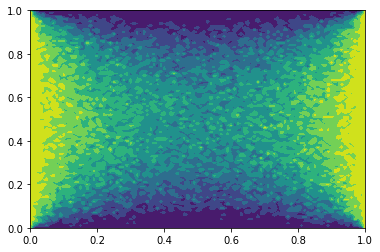

In [7]:
X, Y = np.meshgrid(np.linspace(0, 1, L1+1), np.linspace(0, 1, L1+1))
Z = F

fig, ax = plt.subplots()

ax.contourf(X, Y, Z)

plt.show()

5. Choix des paramètres

On va calculer pour différentes valeurs de L le temps d'attente en secondes et en nombre d'itérations du temps d'attente pour atteindre le bords de D_L en partant du centre (dans le pire des cas)

In [8]:
T = np.zeros((10,3))
for k in range(1,11):
    t = 0
    n = 0
    for l in range(100):
        tps1 = time.time()
        X = [k*10//2,k*10//2]
        while (X[0] != 0 and X[0] != k*10 and X[1]!= 0 and X[1] !=k*10):
            X = marche(X)
            n +=1
        tps2 = time.time()
        t +=tps2 - tps1
    T[k-1][0] = k*10
    T[k-1][1] = t/100
    T[k-1][2] = n/100

In [9]:
print(T)

[[1.00000000e+01 5.46646118e-05 3.17300000e+01]
 [2.00000000e+01 1.88565254e-04 1.11510000e+02]
 [3.00000000e+01 4.34865952e-04 2.59690000e+02]
 [4.00000000e+01 7.27221966e-04 4.40660000e+02]
 [5.00000000e+01 1.30711317e-03 7.96290000e+02]
 [6.00000000e+01 1.71604395e-03 1.05165000e+03]
 [7.00000000e+01 2.30647802e-03 1.40902000e+03]
 [8.00000000e+01 2.94348717e-03 1.80968000e+03]
 [9.00000000e+01 3.41320992e-03 2.10358000e+03]
 [1.00000000e+02 4.83290911e-03 2.92245000e+03]]


Lorsque L augmente, le maillage devient de plus en plus précis, ainsi la solutio se rapproche de la solution continue. Cependant lorsque L augmente, le temps d'atteinte du bord augmente aussi considérablemet. Ceci rend donc plus difficile de calculer une solution approchée suffisamment précise. En effet, pour approcher la valeur de la solution en un point du domaine discrétisé, on applique la méthode des grands nombres qui s'appuie sur la réalisation de plusieurs marches aléatoires. Pour obtenir des courbes de niveau lisse décrivant bien la solution du problème, il faut réaliser un grand nombre de marche aléatoire ce qui prends beaucoup de temps lorsque L est trop grand. Ainsi, il faut trouver un compromis entre la taille du pas et la précision de l'estimation de la solution discrète afin de limiter l'erreur d'estimation (loi des grands nombre) de la solution et l'erreur d'approximation (discrétisation du problème).
Ici, j'ai choisi de prendre L = 100 et K = 20

## Partie 2

1. Définition des paramètres

In [10]:
K2 = 10
L2 = 100

2. Calcul de la solution approchée

On s'inspire de l'exercice 2 de la PC2, on construit une chaine de Markov $(X_{n})_{n \in \mathbb{N}}$ sur $[0,L]^2 $ par la matrice de tranistion P définit par :
$ \forall (i,j) \in [1,L-1]^2 : P((i,j),(i+1,j)) = P((i,j),(i-1,j)) = P((i,j),(i,j+1)) = P((i,j),(i,j-1)) = (1-\alpha)/2$
$ \forall (i,j) \in [1,L-1]^2 : P((i,j),$cimetière$) =  \alpha/2$                                                       
$ \forall i \in [0,L], P((0,i),(0,i))= P((L,i),(L,i)) = P((i,0),(i,0)) = P((i,1),(i,1)) = 1 $
Ensuite on définit la fonction F par 
$ \forall x \in D_{L}$$ F(x) = E_{x}(\phi(X_{T_{\partial D_{L}}} \mathbb{1}_{T_{\partial D_{L}}<+\infty})$
On vérifie alors par un simple calcul que F verifié l'equation : 

$\Delta F - 4\alpha /(1-\alpha) F = 0$

Alors, en posant $ \gamma = 4\alpha /(1-\alpha) $ on peut résoudre l'équation voulue.

In [11]:
def marche_bis(B,X):
    """
    Entrée : 
    B : un entier entre 0 et 1 simulant une loi de bernoulli
    X : un point de D_L
    Sortie :
    X : Le resultat d'une étape de la marche aléatoire dans le plan partant de X
    """
    
    if B == 1: # si B vaut 1, la marche atteint l'état cimetière qui est absorbant
        X = [-1,-1]
    else: # sinon c'est une marche classique dans le plan
        a = randint(0,3)
        if a == 0:
            X[0] += 1
        elif a == 1:
            X[0] -= 1
        elif a == 2:
            X[1] += 1
        else:
            X[1] -= 1 
        
    return(X)

In [12]:
def solution_Monte_Carlo_bis(gamma, K, L):
    """
    Entrée :
    gamma : float représentant un paramètre de l'equation
    L : paramètre de discrétisation du problème
    K : nombre de simulation de la marche aléatoire pour approcher la solution du problème
    Sortie :
    F : un tableau contenant la valeur de la solution approchée en chaque point du domaine d'approximation
    """
    alpha = gamma/(4+gamma)
    F = np.zeros((L+1,L+1))
    B = bernoulli(alpha)
    # On va calculer la valeur de la solution en chaque point qu'on stockera dans le tableau F:
    for i in range(L+1):
        for j in range(L+1): 
            # on va simuler K marche aléatoire partant de D_L[i][j] et calculer la moyenne des valeurs de phi 
            # aux points où la marche atteint le bord pour la première fois.
            n = 0
            P = B.rvs(100000) # on simule les lois de Bernoulli en avance pour gagner du temps
            for k in range(K):
                X = [j,i]
                while (X[0] != 0 and X[0] != L and X[1]!= 0 and X[1] != L and X !=[-1,-1]):
                    try : # dans le cas ou il faut vraiment beaucoup d'étapes pour terminer toutes les marches
                        X = marche_bis(P[n],X)
                    except IndexError :
                        n = 0
                    n = n + 1
                if X !=[-1,-1]:
                    F[i][j] += phi(X,L)
            F[i][j] /= K
    return(F)

3. Représentation des solutions pour différents paramètres gamma

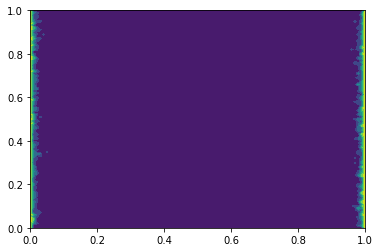

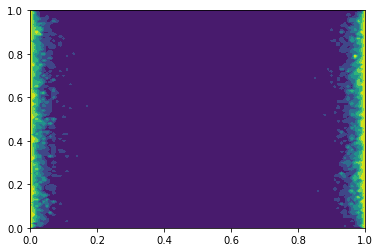

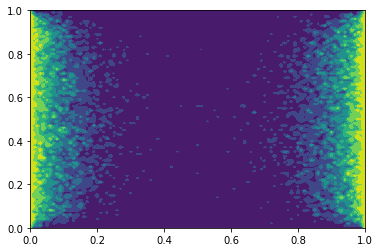

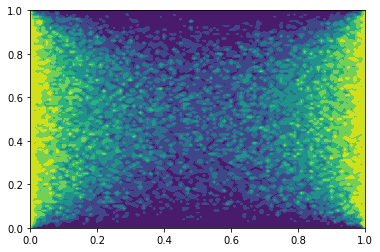

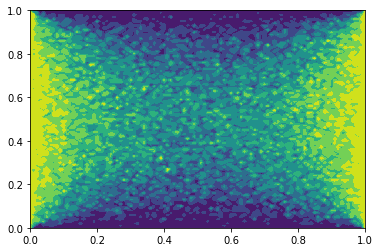

In [13]:
Gamma = [1,10**(-1),10**(-2),10**(-3),10**(-4)]
for gamma in Gamma:
    F_bis = solution_Monte_Carlo_bis(gamma,K2,L2)
    X, Y = np.meshgrid(np.linspace(0, 1, L2+1), np.linspace(0, 1, L2+1))
    Z = F_bis
    fig, ax = plt.subplots()
    ax.contourf(X, Y, Z)

plt.show()

On peut interpreter l'équation précédent comme la diffusion d'un polluant et le terme en -gamma*f un terme réduisant cette diffusion. Ainsi, on observe bien que lorsque gamma est proche de 1 la particule ne peut pas se diffuser et n'existe pas au centre et lorsque gamma diminie on retrouve progressivement une évolution comparable au cas de la partie 1.